<a href="https://colab.research.google.com/github/ziad-mohamed-7/MIA_Tasks/blob/main/TASK1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK1.1- The Unsinkable Predictor**

## **1. Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

## **2. Loading & Inspecting Data**

In [ ]:
# load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# show 1st 5 rows of train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3. Data Cleaning & Preprocessing**

* **Understanding Nature Of Data:**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* **Handling Missing Values:**

In [ ]:
# fill missing Age values in both data & train dataset with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# fill missing Fare values in test dataset with median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# fill missing Embarked values in train dataset with mode (most frequently appeared)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# drop Cabin column (many missing values)
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

# drop Name & Ticket column (unnecessary data)
train_data.drop(columns=['Name', 'Ticket'], inplace=True)
test_data.drop(columns=['Name', 'Ticket'], inplace=True)

* **Feature Encoding:**


In [ ]:
# convert Sex & Embarked (categorical variables) into numerical values using one-hot
# drop_first is true to avoid redundancy
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


* **Feature & target Selection:**


In [ ]:
# select features & target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
x = train_data[features]
y = train_data['Survived']

# prepare test dataset
x_test = test_data[features]

* **Exploratory Data Analysis**

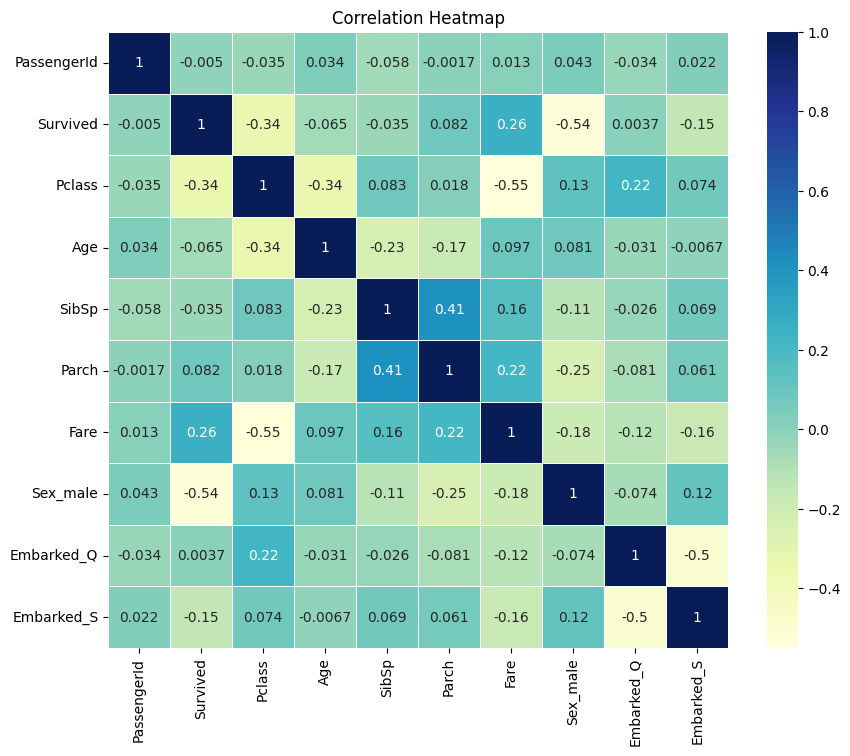

In [ ]:
# plotting a heatmap to visualize the correlation between target and other features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), cmap='YlGnBu', annot=True, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

* **Train-Test Split:**

In [ ]:
# split train dataset into training & validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


## **4. Model Training**

* **Logistic Regression:**

In [ ]:
# train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

# predictions on validation dataset
y_pred_log_reg = log_reg.predict(x_val)


* **Decision Tree Classifier:**

In [ ]:
# train decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

# predictions on validation dataset
y_pred_tree = decision_tree.predict(x_val)


## **5. Model Evaluation**

In [ ]:
# evaluation function
def evaluate_model(model_name, y_true, y_pred):
    print(f"Performance for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# evaluate logistic regression model
evaluate_model("Logistic Regression", y_val, y_pred_log_reg)

print("-------------------------------------")

# evaluate decision tree model
evaluate_model("Decision Tree", y_val, y_pred_tree)


Performance for Logistic Regression:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
F1 Score: 0.7638888888888888
-------------------------------------
Performance for Decision Tree:
Accuracy: 0.7821229050279329
Precision: 0.7272727272727273
F1 Score: 0.7417218543046358


## **6. Prediction on Test Dataset & Generate CSV**

* **Logistic Regression:**


In [ ]:
# predicting survived status for test dataset
y_test_pred_lreg = log_reg.predict(x_test)

# creating DataFrame
log_reg_results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred_lreg
})

# save results to CSV
log_reg_results.to_csv('logistic_regression_results.csv', index=False)


* **Decision Tree:**

In [ ]:
# predicting Survived status for test dataset
y_test_pred_dtree = decision_tree.predict(x_test)

# creating a DataFrame
decision_tree_results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred_dtree
})

# save results to CSV
decision_tree_results.to_csv('decision_tree_results.csv', index=False)
